In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [2]:
from matplotlib import colormaps
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines
    if dbm is not None:
        specs = {
            key: np.array([v for v in ritz_results[key] if v.imag > dbm]) for key in ritz_results
        }
    else:
        specs = ritz_results

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(dpi=1200)

    ax1 = fig.add_subplot()
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("size of Ritz matrix (number of rows/columns)")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")

    ax1.set_ylim(-0.1, 0)
    ax1.axhline(-1/16, linestyle="--", alpha=0.6)
    ax1.axhline(-1/36, linestyle="--", alpha=0.6)
    ax1.axhline(-1/64, linestyle="--", alpha=0.6)
    ax1.axhline(-1/100, linestyle="--", alpha=0.6)
    ax1.axhline(-1/144, linestyle="--", alpha=0.6)
    ax1.axhline(-1/196, linestyle="--", alpha=0.6)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    if x == 0:
        return potential(x+0.01)
    return -1/x + 2/(x**2)

In [4]:
rusl = {}
vc = {}
for i in tqdm(range(25, 300, 25)):
    rusl[i], vc[i] = sturm_liouville_halfline(potential, i, 250, np.pi/2, returns='vectors')

  0%|          | 0/11 [00:00<?, ?it/s]/home/alexhroom/.local/lib/python3.11/site-packages/specpol/common/laguerre.py:96: UserWarning: lagquad failed to bound all roots for the polynomial.
  warnings.warn("lagquad failed to bound all roots for the polynomial.")
100%|██████████| 11/11 [03:17<00:00, 17.97s/it]


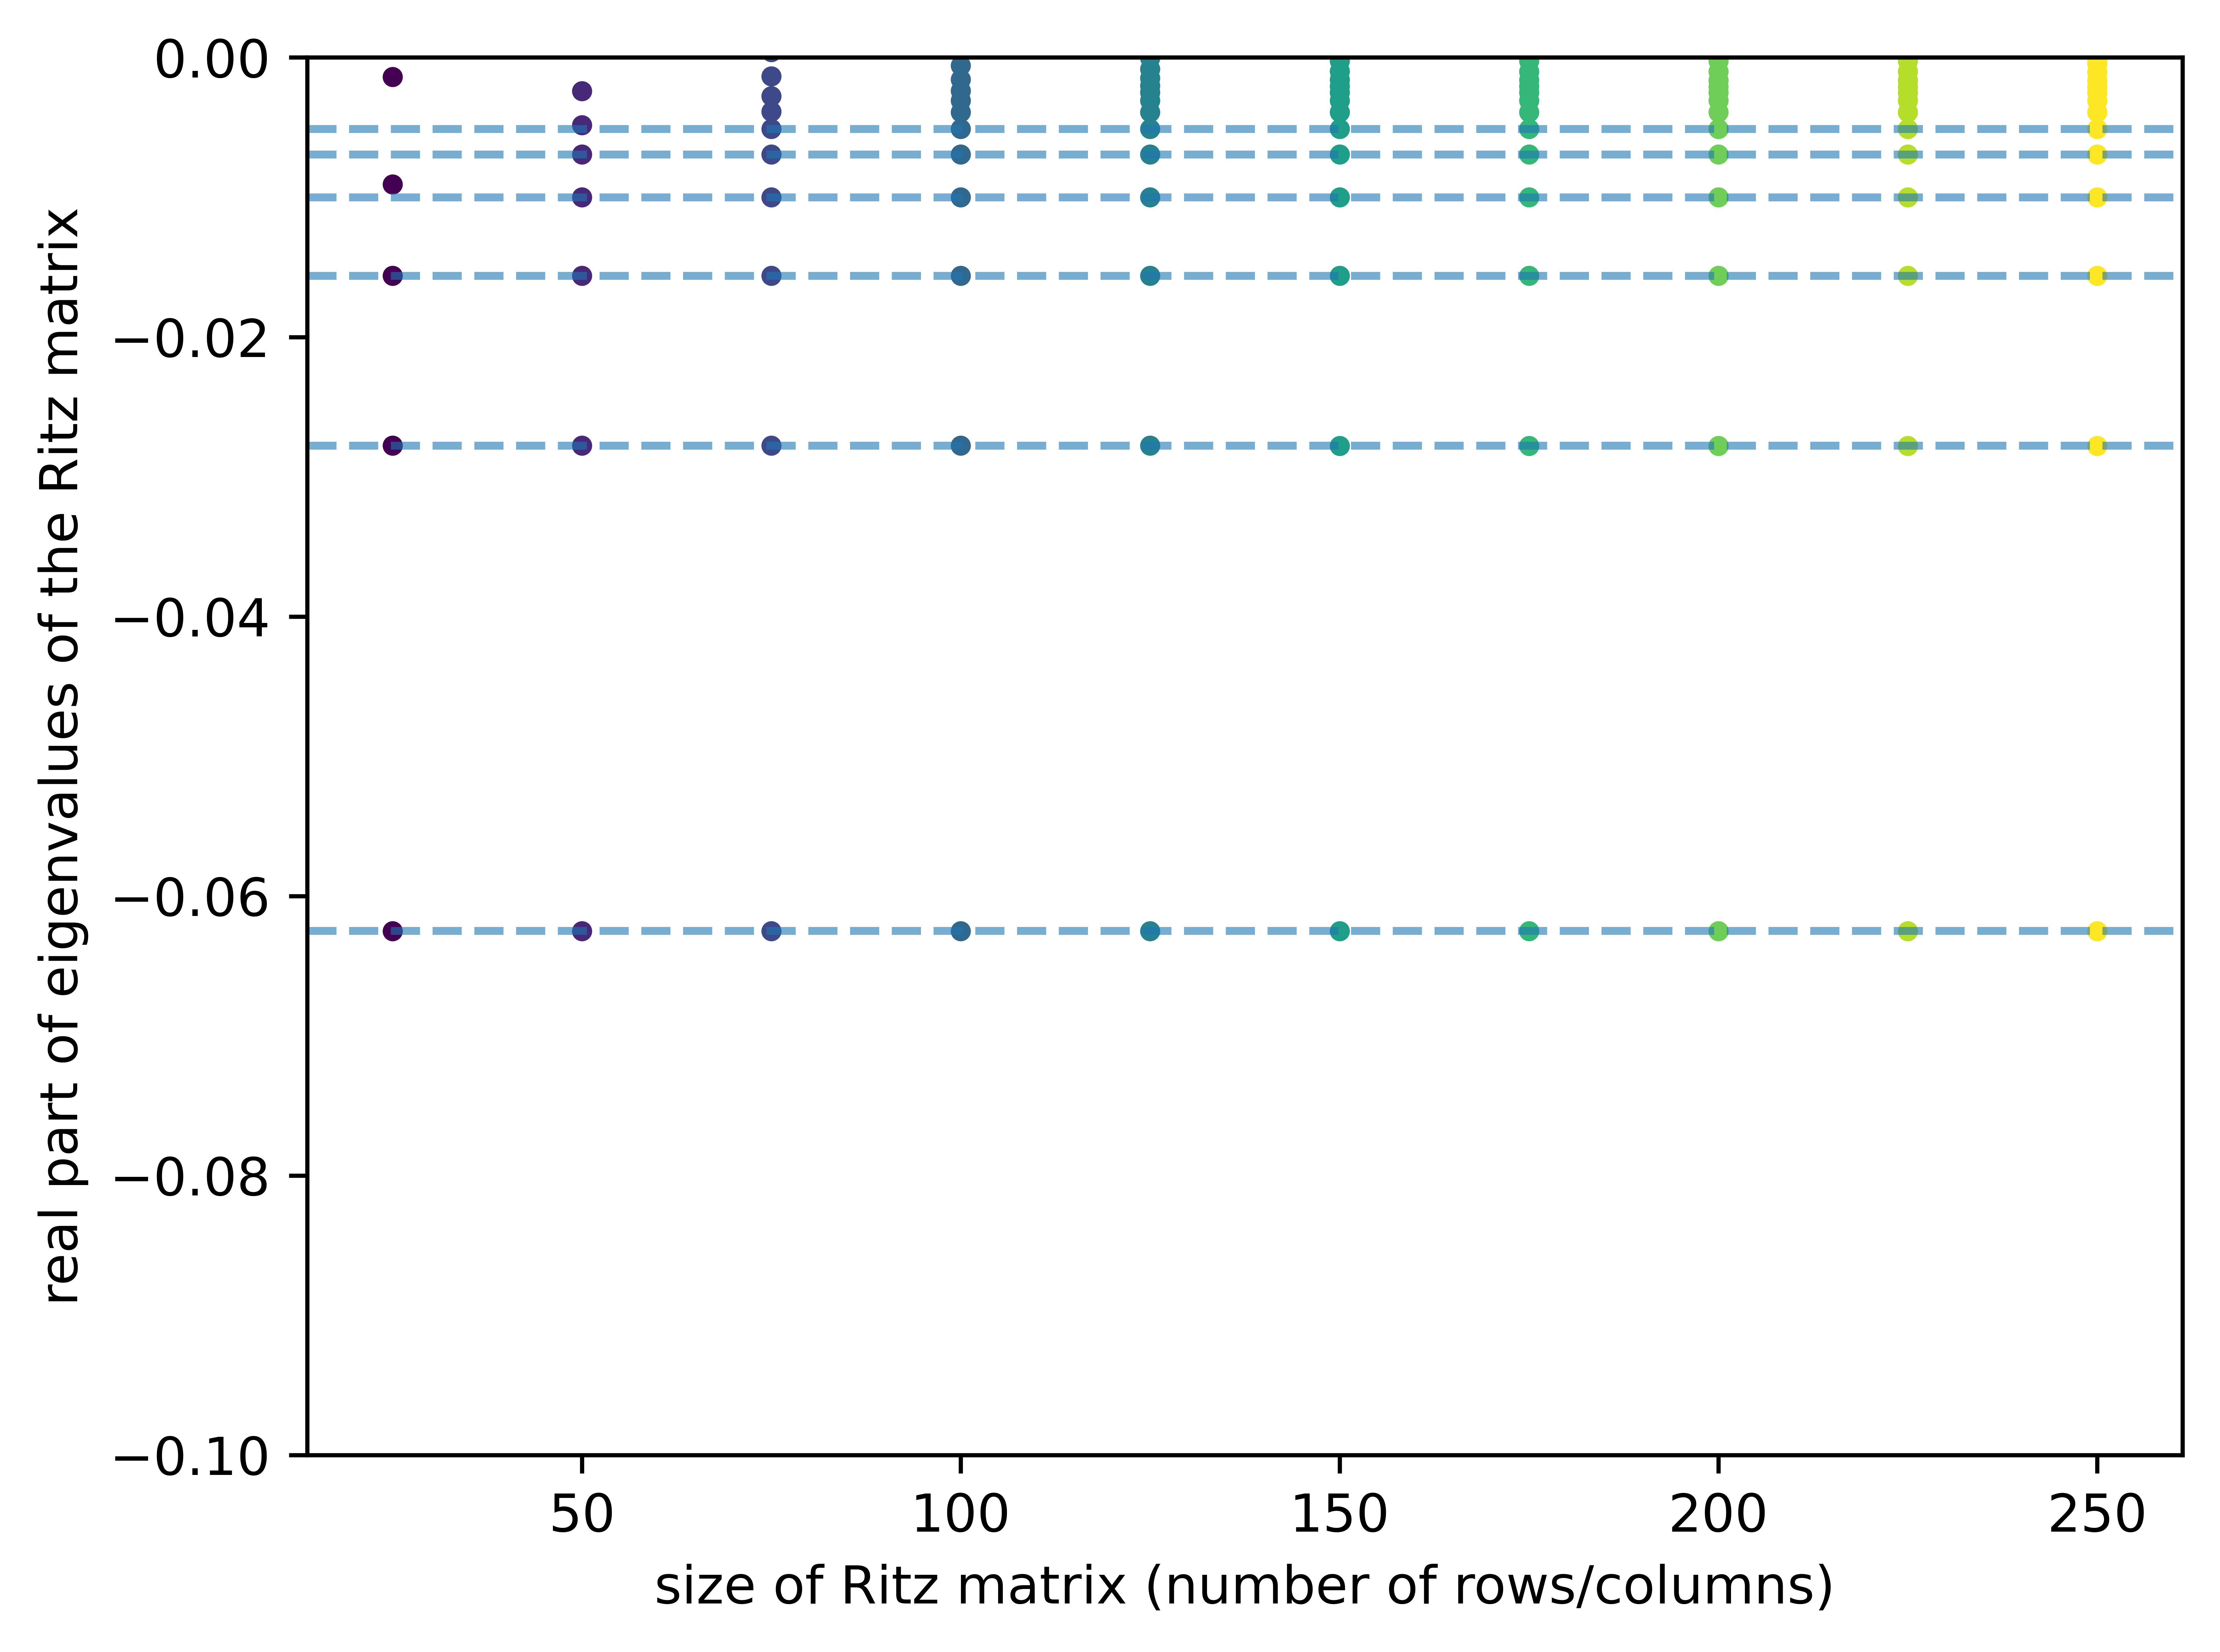

In [5]:
del rusl[275]
plot(rusl)

In [25]:
np.set_printoptions(threshold=np.inf)
print([(i, rusl[50][i]) for i in range(50)])
rusl[200]

[(0, (251.6456217372757+0j)), (1, (135.18013047224758+0j)), (2, (56.86858877357117+0j)), (3, (33.93094510277314+0j)), (4, (18.0150116183347+0j)), (5, (11.198393879559763+0j)), (6, (7.480169431862752+0j)), (7, (5.341972371083411+0j)), (8, (3.9714990025453933+0j)), (9, (3.059068014260148+0j)), (10, (2.413297180914487+0j)), (11, (1.9450048197579355+0j)), (12, (1.5917739587537263+0j)), (13, (1.3209408892413443+0j)), (14, (1.107482290224118+0j)), (15, (0.9372930205335847+0j)), (16, (0.7988078232825566+0j)), (17, (0.6851681094279215+0j)), (18, (0.5904437815433193+0j)), (19, (0.5109880685508308+0j)), (20, (0.44351023785129695+0j)), (21, (0.385931378495537+0j)), (22, (0.33630854963028384+0j)), (23, (0.293388673808328+0j)), (24, (0.2559660551212969+0j)), (25, (0.22325021705433684+0j)), (26, (0.1944620348132804+0j)), (27, (0.16908372621143317+0j)), (28, (-0.06250109320884195+0j)), (29, (0.14659484874204945+0j)), (30, (0.12664548682378515+0j)), (31, (0.10887851841360191+0j)), (32, (0.093051364237

array([ 8.53532437e+02+1.91696631e-31j,  6.94902992e+02-3.88911857e-31j,
        2.69258432e+02-5.91474072e-31j,  2.44292582e+02+5.86899989e-31j,
        1.36213165e+02+1.95770463e-31j,  1.19300899e+02-3.94430137e-31j,
        8.20513271e+01-1.97167078e-31j,  6.74832460e+01-3.92889709e-31j,
        5.16700991e+01+1.98804123e-31j,  4.27539653e+01+7.78075685e-31j,
        3.47014467e+01-1.91100377e-31j,  2.93610051e+01-1.91148551e-31j,
        2.47173608e+01-1.95673936e-31j,  2.13514917e+01-1.23158161e-31j,
        1.84338476e+01+4.14389100e-31j,  1.61965202e+01+5.85625321e-32j,
        1.42450656e+01+1.38695857e-31j,  1.26889563e+01+6.47893261e-32j,
        1.13200697e+01+2.17220081e-31j,  1.01965563e+01+3.34879030e-38j,
        9.19962757e+00+5.17923667e-32j,  8.36302272e+00-8.98387260e-32j,
        7.61464026e+00-2.78163148e-32j,  6.97542829e+00+5.44336545e-32j,
        6.39940037e+00-1.37207944e-31j,  5.90027737e+00+1.62944183e-31j,
        5.44750714e+00-1.46266863e-31j,  5.05047378

In [22]:
rusl[50][35]

(-0.027778161882900686+0j)

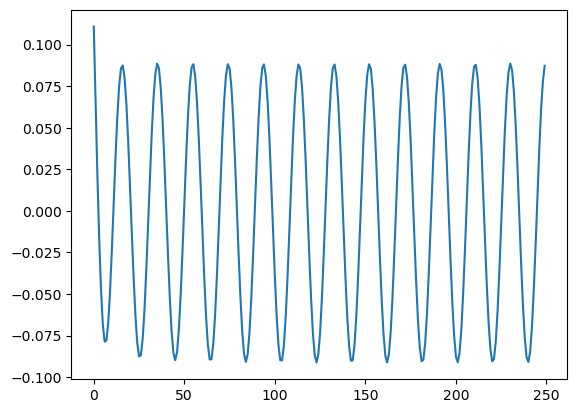

In [30]:
plt.plot(vc[250][:,25])